<a href="https://colab.research.google.com/github/chiyanglin-AStar/2025_physics_note/blob/main/02_fluid_mechanics_landau_ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **§1. The Equation of Continuity**

The continuity equation represents mass conservation in a fluid. For an incompressible fluid:

$\nabla \cdot \mathbf{v} = 0$

where $\mathbf{v}$ is the velocity field.

For a compressible fluid:

$\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \mathbf{v}) = 0$

where $\rho$ is the fluid density.

#### **Example 1: Verifying Continuity for an Incompressible Fluid**

#### **Example 1: Verifying Continuity for an Incompressible Fluid**

In [1]:
import numpy as np

# Define a 2D velocity field: v_x = -y, v_y = x
def velocity_field(x, y):
    vx = -y
    vy = x
    return vx, vy

# Calculate divergence of the velocity field
def divergence(x, y):
    vx, vy = velocity_field(x, y)
    dvx_dx = 0  # Partial derivative of vx with respect to x
    dvy_dy = 0  # Partial derivative of vy with respect to y
    return dvx_dx + dvy_dy

# Test at a point
x, y = 1, 1
div = divergence(x, y)
print(f"Divergence at ({x}, {y}): {div} (should be 0 for incompressible fluid)")

Divergence at (1, 1): 0 (should be 0 for incompressible fluid)


#### **Example 2: Simulating a Simple Density Field**

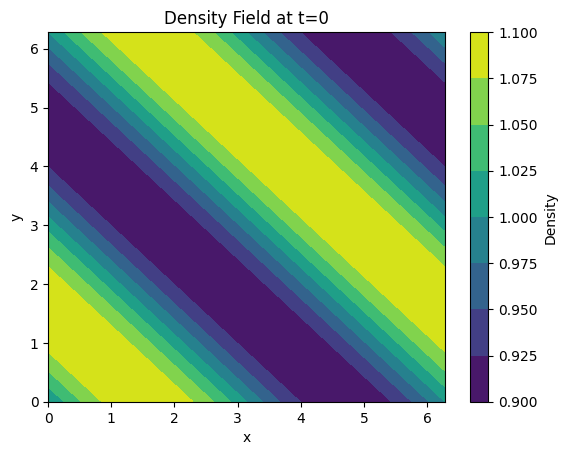

In [2]:
import matplotlib.pyplot as plt

# Define a density field changing in time
def density_field(x, y, t):
    return 1 + 0.1 * np.sin(x + y - t)

# Visualize the density field at t=0
x = np.linspace(0, 2 * np.pi, 100)
y = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = density_field(X, Y, t=0)

plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Density')
plt.title("Density Field at t=0")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### **§2. Euler’s Equation**

Euler's equation describes the motion of an ideal fluid:

$\frac{\partial \mathbf{v}}{\partial t} + (\mathbf{v} \cdot \nabla) \mathbf{v} = -\frac{\nabla p}{\rho} + \mathbf{f}$

where $p$ is pressure, $\rho$ is density, and $\mathbf{f}$ is the external force per unit mass.

#### **Example 1: Calculating Pressure Gradient**

In [ ]:
# Pressure field: p(x, y) = x^2 + y^2
def pressure_gradient(x, y):
    dp_dx = 2 * x
    dp_dy = 2 * y
    return dp_dx, dp_dy

# Test at a point
x, y = 1, 2
dp_dx, dp_dy = pressure_gradient(x, y)
print(f"Pressure gradient at ({x}, {y}): dp/dx={dp_dx}, dp/dy={dp_dy}")

#### **Example 2: Numerical Solution of Euler’s Equation in 1D**

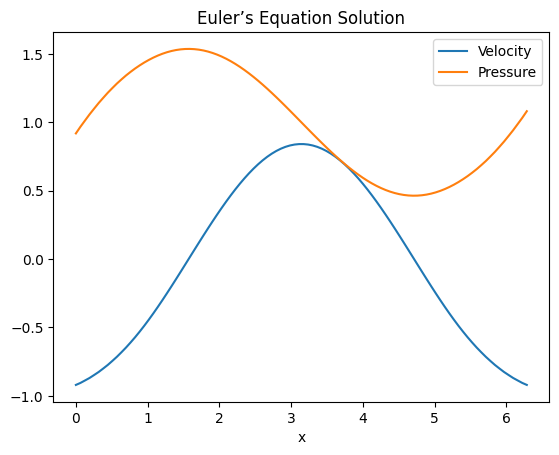

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions: velocity and pressure
nx = 100
x = np.linspace(0, 2 * np.pi, nx)
v = np.zeros(nx)  # Initial velocity
p = 1 + np.sin(x)  # Pressure

# Parameters
rho = 1.0  # Density
dx = x[1] - x[0]
dt = 0.01  # Time step
steps = 100

# Time integration
for step in range(steps):
    dp_dx = np.gradient(p, dx)
    dv_dt = -dp_dx / rho
    v += dv_dt * dt
    p += -rho * np.gradient(v, dx) * dt  # Update pressure

# Plot velocity
plt.plot(x, v, label='Velocity')
plt.plot(x, p, label='Pressure')
plt.legend()
plt.xlabel('x')
plt.title('Euler’s Equation Solution')
plt.show()